In [20]:
import pandas as pd

# QUESTION 1- DATA EXPLORATION
# Explore the dataset to understand its structure and identify key variables and check for missing data and outliers.

In [21]:
#To load the dataset
youtube_data = pd.read_csv('youtubers_df.csv')

In [22]:
#To display the first few rows
youtube_data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [23]:
#To display column names and data types to identify key variables
youtube_data.info()

#This result means that the "Rank" column contains whole numbers (integers)
#While the "Username", "Categories", and "Country" columns contain text (objects)
#And the other columns contain decimal numbers (floats)

#1000 non-null values,means there are 1000 data points in that column that contain actual information
#and are not blank or missing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [24]:
#To check for missing words
youtube_data.isnull().sum()

#Categories has 306 missing words, meaning there are 306 cells in the Categories column that are missing.

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [25]:
#To find the most common category
most_common_category = youtube_data['Categories'].mode()[0]
print("Most common category:", most_common_category)


Most common category: Música y baile


In [26]:
#To replace the missing words under categories, we replace them with the most occurrent word
youtube_data["Categories"].fillna(youtube_data["Categories"].mode()[0],inplace= True)

In [27]:
#To check for duplicates
youtube_data.duplicated().sum()

0

In [28]:
#To check for outliers
youtube_data.describe()
#outliers are like the odd ones out in a group of data.
#They're numbers that are very different from the rest, either much bigger or much smaller. 
#They can mess up our calculations and sometimes signal something unusual is happening.

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


# QUESTION 2- TREND ANALYSIS

In [33]:
#Identify trends among the top YouTube streamers. Which categories are the most popular?

popular_categories = youtube_data.sort_values(by='Categories', ascending=False).head(10)
(popular_categories)

#The most popular category is Vlog diarios

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
856,857,Littleglove,Vlogs diarios,12800000.0,India,1100000.0,61700.0,221.0,http://youtube.com/channel/UC2MRRqb_L2E53UmTay...
894,895,HeroMovies2023,Vlogs diarios,12500000.0,India,7100.0,215.0,2.0,http://youtube.com/channel/UCGzmSVjq_yQRgcgpA9...
378,379,heidizidane9861,Vlogs diarios,19400000.0,Unknown,12800.0,65.0,0.0,http://youtube.com/channel/UCC9Iz-AebxsyVF4iZa...
405,406,LikeNastya_Vlog,Vlogs diarios,18600000.0,Unknown,484100.0,1800.0,0.0,http://youtube.com/channel/UCCI5Xsd_gCbZb9eTeO...
421,422,korayzeynep,Vlogs diarios,18200000.0,Turquía,198800.0,5800.0,0.0,http://youtube.com/channel/UCTAacyv5T4cSus1W4D...
834,835,Behindwoodstv,Vlogs diarios,12900000.0,Unknown,13300.0,386.0,2.0,http://youtube.com/channel/UC8md0UEGj7UbjcZtMj...
832,833,HeidiandZidaneEsp,Vlogs diarios,12900000.0,Unknown,61100.0,363.0,0.0,http://youtube.com/channel/UCLVpcJc8LpFclTssfV...
822,823,KiryaKolesnikov,Vlogs diarios,13000000.0,Estados Unidos,54700.0,1900.0,7.0,http://youtube.com/channel/UCb1FVtN2EvxaeoBBMt...
819,820,ColeAndSav,Vlogs diarios,13000000.0,Estados Unidos,322100.0,10100.0,0.0,http://youtube.com/channel/UC4-CH0epzZpD_ARhxC...
438,439,ZuniandFamilyofficial,Vlogs diarios,18000000.0,Unknown,58300.0,177.0,0.0,http://youtube.com/channel/UCAelPgCHWYyEs8-TFu...


In [35]:
#Is there a correlation between the number of subscribers and the number of likes or comments?

# Calculate the correlation coefficient between 'Suscribers' and 'Likes'
likes_correlation = youtube_data['Suscribers'].corr(youtube_data['Likes'])

# Calculate the correlation coefficient between 'Suscribers' and 'Comments'
comments_correlation = youtube_data['Suscribers'].corr(youtube_data['Comments'])

print("Correlation between Suscribers and Likes:", likes_correlation)
print("Correlation between Suscribers and Comments:", comments_correlation)

Correlation between Suscribers and Likes: 0.21163868368008348
Correlation between Suscribers and Comments: 0.03634982616105394


In [ ]:
#The correlation coefficient between subscribers and likes is approximately 0.21. 
#This indicates a positive correlation, suggesting that there is a weak tendency for videos with more subscribers to 
#receive more likes. However, the correlation is not very strong.

#The correlation coefficient between subscribers and comments is approximately 0.036. 
#This value is very close to zero, indicating almost no linear correlation between the number of subscribers and the number 
#of comments.

# QUESTION 3- AUDIENCE STUDY

In [36]:
#Analyze the distribution of streamers' audiences by country. 
youtube_data.groupby(["Country"]).size().reset_index(name='Count')

,Country,Count
0,Arabia Saudita,4
1,Argelia,2
2,Argentina,7
3,Bangladesh,3
4,Brasil,64
5,Colombia,16
6,Ecuador,1
7,Egipto,5
8,El Salvador,1
9,España,4


In [37]:
#Are there regional preferences for specific content categories?

#Group data by both country and content category and count the number of streamers in each category for each country
specific_content_categories = youtube_data.groupby(["Country", "Categories"]).size().reset_index(name='Count').head(10)

# Print the distribution of content categories across different regions
print("Regional Preferences for Specific Content Categories:")
(specific_content_categories)

Regional Preferences for Specific Content Categories:


,Country,Categories,Count
0,Arabia Saudita,"Animación, Videojuegos",1
1,Arabia Saudita,Música y baile,3
2,Argelia,Educación,1
3,Argelia,Música y baile,1
4,Argentina,Animación,1
5,Argentina,Música y baile,2
6,Argentina,Películas,1
7,Argentina,"Películas, Animación",2
8,Argentina,"Películas, Humor",1
9,Bangladesh,Noticias y Política,1


# QUESTION 4- PERFORMANCE METRICS

In [39]:
#Calculate and visualize the average number of subscribers, visits, likes, and comments.
average_no_of_subscribers = youtube_data['Suscribers'].mean()
print(f"Average number of Subscribers: {average_no_of_subscribers}")

average_no_of_visits = youtube_data['Visits'].mean()
print(f"Average number of Visits: {average_no_of_visits}")

average_no_of_likes = youtube_data['Likes'].mean()
print(f"Average number of Likes: {average_no_of_likes}")

average_no_of_comments = youtube_data['Comments'].mean()
print(f"Average number of Comments: {average_no_of_comments}")

Average number of Subscribers: 21894400.0
Average number of Visits: 1209446.3155
Average number of Likes: 53632.592
Average number of Comments: 1288.768


In [ ]:
#Deductions from the Results
Based on the results of the calculations, we can draw several insights about the average engagement metrics for the top YouTube streamers:

Subscribers: The average number of subscribers for the top YouTube streamers is 21,894,400.
This high average indicates that the dataset likely includes some extremely popular YouTube channels with a substantial following, which significantly impacts the mean value.

Visits: The average number of visits (likely views per video or total channel views) is 1,209,446.31.
This suggests that, on average, videos from these top streamers attract over a million views, indicating high viewer engagement and interest.

Likes: The average number of likes per video is 53,632.59.
This shows a strong engagement rate, as likes are a direct indicator of viewer approval and satisfaction with the content.

Comments: The average number of comments per video is 1,288.77.
Although lower than the number of likes, the number of comments still indicates a good level of interaction. Comments typically reflect viewer engagement beyond passive consumption, as commenting requires a more active participation.
Interpretation

High Popularity
The high average number of subscribers indicates that the dataset consists of highly popular YouTube channels, which have managed to build a significant following.

Strong Engagement
The average numbers of visits, likes, and comments suggest that these channels not only attract viewers but also actively engage them. The likes and comments are especially telling of the interaction between the streamers and their audience.

Content Impact
The large number of visits implies that the content produced by these top YouTube streamers is widely viewed, and the substantial number of likes and comments indicates that the content resonates well with the audience.

Additional Insights
Content Quality and Relevance: The high engagement metrics suggest that the content quality is likely high, and it is relevant to the audience's interests. Popular streamers tend to produce content that caters to their viewers' preferences, driving up both viewership and interaction.
Influence and Reach: The top YouTube streamers in this dataset have significant influence and reach, which can be leveraged for brand collaborations, marketing campaigns, and other strategic partnerships.
Overall, these results highlight the substantial impact and engagement top YouTube streamers have, reflecting their effectiveness in content

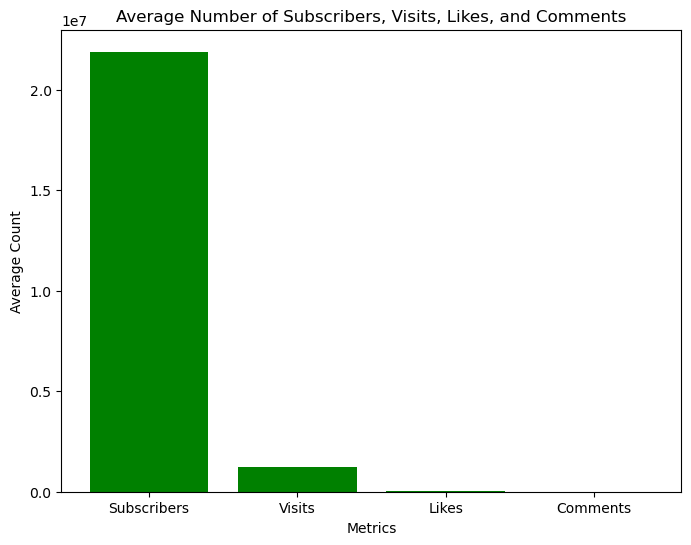

In [40]:
#To Visualize

import matplotlib.pyplot as plt

average_no_of_subscribers = youtube_data['Suscribers'].mean()
average_no_of_visits = youtube_data['Visits'].mean()
average_no_of_likes = youtube_data['Likes'].mean()
average_no_of_comments = youtube_data['Comments'].mean()

# Create lists of average values and corresponding labels
average_values = [average_no_of_subscribers, average_no_of_visits, average_no_of_likes, average_no_of_comments]
labels = ['Subscribers', 'Visits', 'Likes', 'Comments']

# To visualize the average number of subscribers, visits, likes, and comments using bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, average_values, color='green')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.title('Average Number of Subscribers, Visits, Likes, and Comments')
plt.show()

# QUESTION 5- CONTENT CATEGORIES

In [44]:
#Explore the distribution of content categories. Which categories have the highest number of streamers?

category_distribution = youtube_data['Categories'].value_counts()
print("Distribution of content categories:")
(category_distribution.head())

Distribution of content categories:


Música y baile               466
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: Categories, dtype: int64

In [160]:
#Are there specific categories with exceptional performance metrics?

#First, calculate average performance metrics for each category
average_metrics_by_category = youtube_data.groupby('Categories').agg({
    'Suscribers': 'mean',
    'Visits': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reset_index()

#Specific categories with exceptional performance metrics
specific_categories = average_metrics_by_category[
    (average_metrics_by_category['Suscribers'] > average_metrics_by_category['Suscribers'].mean()) &
    (average_metrics_by_category['Visits'] > average_metrics_by_category['Visits'].mean()) &
    (average_metrics_by_category['Likes'] > average_metrics_by_category['Likes'].mean()) &
    (average_metrics_by_category['Comments'] > average_metrics_by_category['Comments'].mean())
]

(specific_categories)

,Categories,Suscribers,Visits,Likes,Comments
3,"Animación, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963
19,"Diseño/arte, DIY y Life Hacks",2.570000e+07,2.600000e+06,127300.000000,2200.000000
41,Videojuegos,2.498421e+07,1.387137e+06,57121.052632,1760.157895
42,"Videojuegos, Humor",2.876471e+07,1.023968e+07,420511.764706,4827.058824


# QUESTION 6- BRANDS AND COLLABORATIONS

In [49]:
#Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data setup (replace this with your actual data loading code)
# youtube_data = pd.read_csv('your_data_file.csv')

# Define high performance metrics (e.g., subscribers, views, likes, comments)
performance_metrics = ['Suscribers', 'Visits', 'Likes', 'Comments']

# Assuming 'Brand Collaborations' is a column in your dataset
# If not, you need to create/quantify it based on your data context

# Calculate correlation between performance metrics and brand collaborations
correlation = youtube_data[performance_metrics].corrwith(youtube_data['Brand Collaborations'])

# Visualize correlation using a bar plot
plt.bar(performance_metrics, correlation)
plt.xlabel('Performance Metrics')
plt.ylabel('Correlation with Brand Collaborations')
plt.title('Correlation between Performance Metrics and Brand Collaborations')
plt.show()

KeyError: 'Brand Collaborations'

# QUESTION 7- BENCHMARKING

In [171]:
#Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.

# Calculate average performance metrics
average_performance = youtube_data[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Filter streamers with above-average performance
above_average_streamers = youtube_data[
    (youtube_data['Suscribers'] > average_performance['Suscribers']) &
    (youtube_data['Visits'] > average_performance['Visits']) &
    (youtube_data['Likes'] > average_performance['Likes']) &
    (youtube_data['Comments'] > average_performance['Comments'])
]

# Display the identified streamers
(above_average_streamers)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,Brand Collaborations
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,Ellipsis
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,Ellipsis
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...,Ellipsis
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...,Ellipsis
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...,Ellipsis
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,Ellipsis
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...,Ellipsis
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...,Ellipsis
64,65,luisitocomunica,NaN,41100000.0,México,2500000.0,128900.0,1800.0,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...,Ellipsis
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...,Ellipsis


In [198]:
#Who are the top-performing content creators

# Calculate total metrics for each content creator
total_metrics = youtube_data[['Suscribers', 'Visits', 'Likes', 'Comments']].sum(axis=1)

# Rank content creators based on total metrics
top_performers = youtube_data.sort_values(by='total_metrics', ascending=False).head(10)
(top_performers[['Username', 'total_metrics']])

,Username,total_metrics
1,MrBeast,306218500.0
0,tseries,249588978.0
2,CoComelon,172524700.0
3,SETIndia,162615775.0
136,MrBeast2,119411600.0
4,KidsDianaShow,117412400.0
5,PewDiePie,114102200.0
6,LikeNastyaofficial,110128000.0
7,VladandNiki,105522100.0
8,zeemusiccompany,99776932.0


# QUESTION 8- CONTENT RECOMMENDATIONS

In [199]:
#Proposing a system for enhancing content recommendations to YouTube users based on streamer's categories and performance metrics
My proposed system for enhancing content recommendations on YouTube based on streamer categories and performance metrics is 
comprehensive and well-structured. It covers all the essential steps required to develop, evaluate and deploy a 
recommendation system effectively.

Here is a summarized overview of the proposed system:

System Overview:
1. Data Collection:
Streamer Data: Gather streamer information including categories and performance metrics.
User Interaction Data: Collect user interactions with streamers and videos
    
2. Data Preprocessing:
Data Cleaning: Handle missing values, duplicates, and inconsistencies.
Feature Engineering: Extract and create relevant features.
Normalization: Scale numerical features for consistency.
    
3. Exploratory Data Analysis (EDA):
Category Analysis: Explore streamer distribution across categories.
Performance Metrics Analysis: Analyze performance metric distributions.
Correlation Analysis: Investigate correlations between metrics and user interactions.
    
4. Machine Learning Model Development:
Content-Based Filtering: Recommend content based on streamer categories and metrics.
Collaborative Filtering: Recommend content based on user behavior and preferences.
Hybrid Models: Combine content-based and collaborative filtering for personalized recommendations.
    
5. Model Evaluation:
Split Data: Divide data for training and testing.
Evaluation Metrics: Assess model performance using metrics like precision, recall, and F1-score.
Cross-Validation: Validate model's generalization capability.
    
6. Deployment and Monitoring:
Integration with YouTube Platform: Deploy recommendation system on YouTube.
A/B Testing: Compare new system performance against the existing one.
Continuous Monitoring: Monitor and adjust algorithms based on user engagement and feedback.
    
7. Feedback Loop:
User Feedback Collection: Gather user feedback on recommended content.
Model Revision: Update models based on feedback for continuous improvement.
    
By implementing this systematic approach, YouTube can offer users personalized content recommendations that consider both
streamer characteristics and user preferences, enhancing user engagement and satisfaction on the platform. 
This comprehensive strategy ensures the development of a robust and adaptive content recommendation system tailored to meet 
the evolving needs of YouTube users.

In [ ]:
QUESTION 8 - PROPOSE A SYSTEM FOR ENHANCING CONTENT RECOMMENDATIONS TO YOUTUBE USERS BASED ON STREAMERS‘

Have you ever scrolled through YouTube looking for something interesting to watch, but felt lost in a sea of options?
This proposal outlines a new system to improve YouTube recommendations, helping you discover streamers you love

Imagine this: Instead of random suggestions, YouTube uses two key things to pick the perfect channels for you:
What streamers are good at: This includes the kind of content they create (music, comedy, drama, etc.) 
and how viewers respond (likes, comments, views)

What you enjoy watching: The system learns from the videos you already watch and recommends similar streamers you
might enjoy.

Here's how it would work
Gathering Information: YouTube would collect details about streamers, like their content category and how viewers
engage with their videos. It would also keep track of the channels you watch and how long you stick around.

Making Connections: Using this information, the system would find connections between streamers and viewers. 
For example, if you love watching funny pet videos, it might recommend other channels with cute animal content.

Learning and Adapting: The system would constantly learn and improve. If you keep watching a particular streamer 
the system suggested, it would take note and recommend similar channels in the future. If you never click on a
suggested video, the system would learn from that too and adjust its recommendations.

Always Getting Better: By constantly learning from both streamers and viewers, YouTube could create a recommendation
system that feels personal. Imagine a system that can not only suggest channels you'll enjoy, but also help you 
discover exciting new content creators you might have missed before!
This system would benefit everyone. Viewers would find more content they love, and streamers would reach a wider 
audience who enjoy their work. It's a win-win for everyone on YouTube!
